In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8)

In [2]:
#Read data

df = pd.read_csv(r"D:\MoviesPy\archive\movies.csv")
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [3]:
#Check missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{} - {}%".format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
#Missing data is low, let's just drop it

df = df.dropna()

In [5]:
#Data Types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
#Fix data types
df["budget"] = df["budget"].astype("int64")
df["votes"] = df["votes"].astype("int64")
df["gross"] = df["gross"].astype("int64")
df["runtime"] = df["runtime"].astype("int64")

In [7]:
df = df.sort_values(by = "gross", ascending = False)

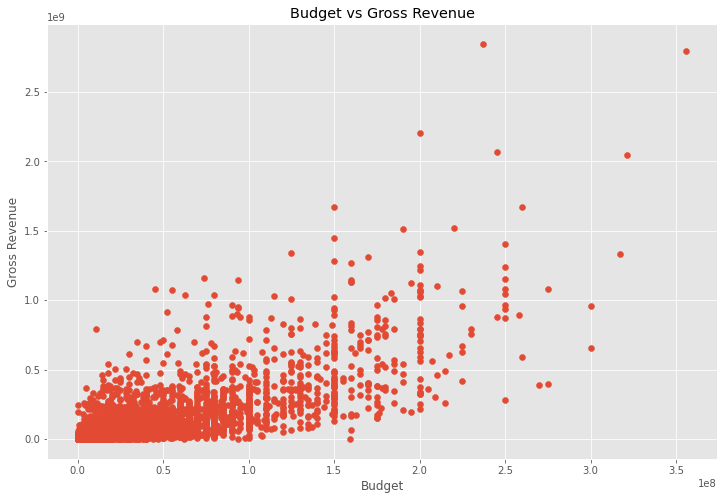

In [8]:
#Scatter budget vs gross

plt.scatter(x=df["budget"], y=df.gross)
plt.title("Budget vs Gross Revenue")
plt.xlabel("Budget")
plt.ylabel("Gross Revenue")
plt.show()

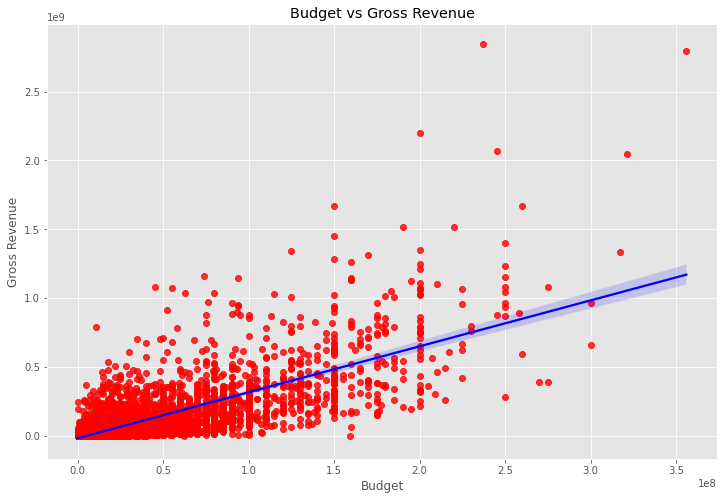

In [9]:
#Seaborn regplot

sns.regplot(x="budget", y="gross", data = df, color = "red", line_kws={"color":"blue"})
plt.title("Budget vs Gross Revenue")
plt.xlabel("Budget")
plt.ylabel("Gross Revenue")
plt.show()


In [10]:
#correlation matrix
correlation_matrix = df.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

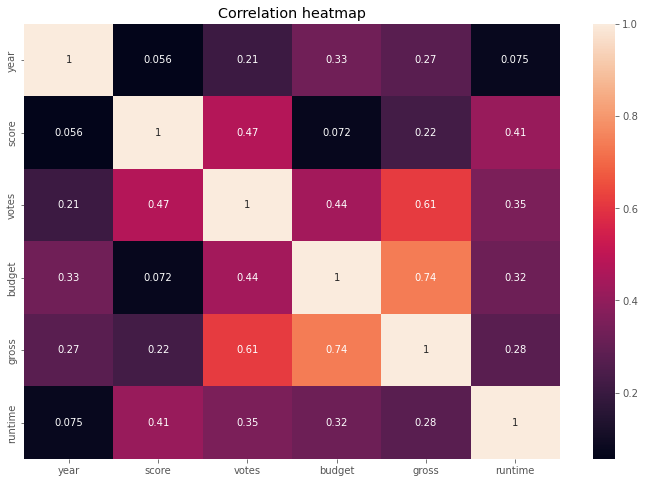

In [11]:
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation heatmap")

plt.show

In [12]:
#Apparently the factors that affect gross more are gross revenue and user votes on IMDB
#The previous category only took in mind numeric values, let's see 

In [13]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == "object"):
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5.8,3500,585,2924,1498,47,3000000,5073,1385,96
2434,2969,5,0,1993,1467,4.5,1900,1805,3102,186,47,5000000,2970,1376,97
3681,1595,3,6,2000,1721,6.8,43000,952,1683,527,6,5000000,2554,466,108
272,2909,6,9,1982,1525,3.9,2300,261,55,1473,47,800000,2270,582,85


<function matplotlib.pyplot.show(close=None, block=None)>

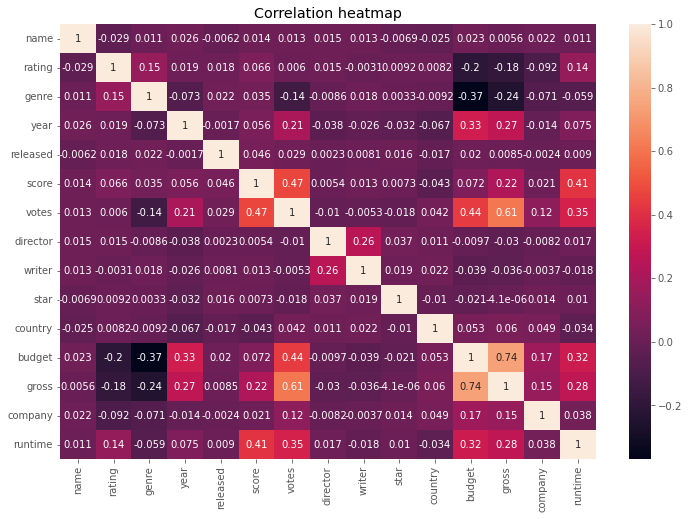

In [14]:
corr_mat = df_numerized.corr()
sns.heatmap(corr_mat, annot = True)
plt.title("Correlation heatmap")

plt.show

In [21]:
corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()
corr_pairs = corr_pairs.sort_values()

corr_pairs.tail(30)

budget    runtime     0.318695
year      budget      0.327722
budget    year        0.327722
votes     runtime     0.352303
runtime   votes       0.352303
          score       0.414068
score     runtime     0.414068
votes     budget      0.439675
budget    votes       0.439675
votes     score       0.474256
score     votes       0.474256
votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
#The factors that affect gross revenue the most are votes and budget.